In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Встановлюємо стиль
plt.style.use('fivethirtyeight')

# 1. Зчитування файлу (з правильним кодуванням)
try:
    df = pd.read_csv('spotify-2023.csv', encoding='latin-1')
    print("Файл успішно завантажено!")
except FileNotFoundError:
    print("Помилка: Не знайдено файл! Завантажте файл spotify-2023.csv у Colab (папка зліва).")

# 2. Очищення колонки 'streams'
# Деякі значення можуть бути текстом, перетворюємо їх на цифри
df['streams'] = pd.to_numeric(df['streams'], errors='coerce')

# Видаляємо рядки, де streams не вдалося перетворити на цифри (NaN)
df = df.dropna(subset=['streams'])

# 3. Перегляд даних
print("Розмір датасету:", df.shape)
df.head()

Файл успішно завантажено!
Розмір датасету: (952, 24)


,track_name,artist(s)_name,artist_count,released_year,released_month,released_day,in_spotify_playlists,in_spotify_charts,streams,in_apple_playlists,...,bpm,key,mode,danceability_%,valence_%,energy_%,acousticness_%,instrumentalness_%,liveness_%,speechiness_%
0,Seven (feat. Latto) (Explicit Ver.),"Latto, Jung Kook",2,2023,7,14,553,147,141381703.0,43,...,125,B,Major,80,89,83,31,0,8,4
1,LALA,Myke Towers,1,2023,3,23,1474,48,133716286.0,48,...,92,C#,Major,71,61,74,7,0,10,4
2,vampire,Olivia Rodrigo,1,2023,6,30,1397,113,140003974.0,94,...,138,F,Major,51,32,53,17,0,31,6
3,Cruel Summer,Taylor Swift,1,2019,8,23,7858,100,800840817.0,116,...,170,A,Major,55,58,72,11,0,11,15
4,WHERE SHE GOES,Bad Bunny,1,2023,5,18,3133,50,303236322.0,84,...,144,A,Minor,65,23,80,14,63,11,6


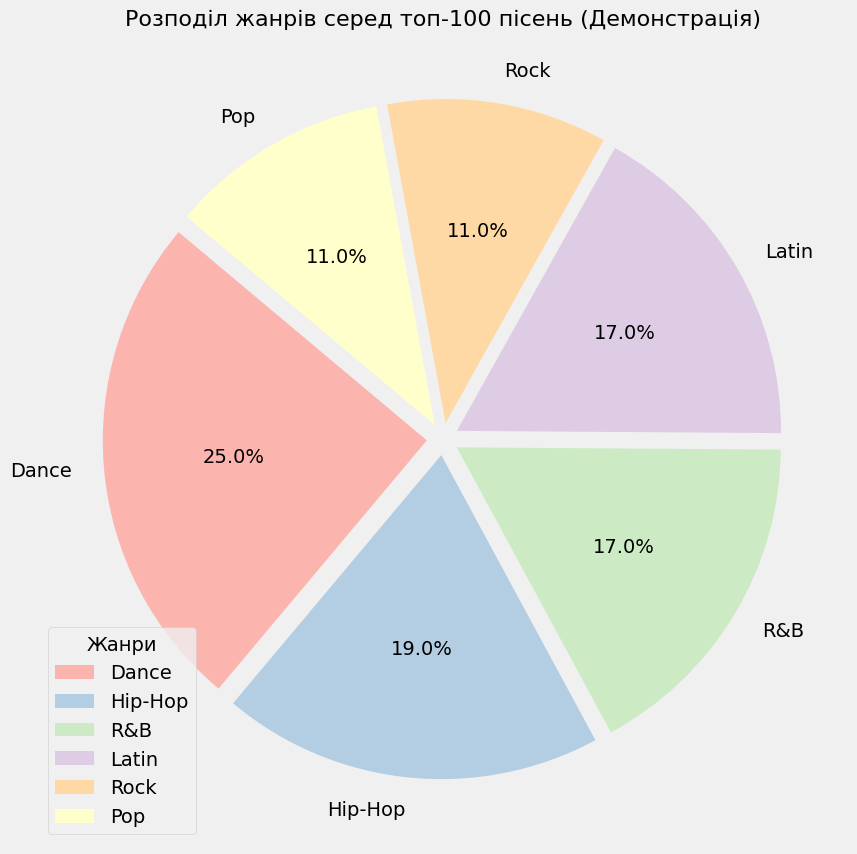

In [2]:
# Оскільки в датасеті немає колонки Genre, створимо її для демонстрації навичок
np.random.seed(42)
genres_list = ['Pop', 'Hip-Hop', 'Rock', 'Dance', 'R&B', 'Latin']
df['dummy_genre'] = np.random.choice(genres_list, size=len(df))

# Підрахунок кількості пісень у кожному жанрі (беремо топ-100 пісень для вибірки)
top_100 = df.head(100)
genre_counts = top_100['dummy_genre'].value_counts()

# Створення кругової діаграми
plt.figure(figsize=(10, 10))

# pie chart
plt.pie(genre_counts,
        labels=genre_counts.index,
        autopct='%1.1f%%', # Відображення відсотків
        startangle=140,
        colors=plt.cm.Pastel1.colors,
        explode=[0.05]*len(genre_counts)) # Трохи "розсунути" шматочки

plt.title('Розподіл жанрів серед топ-100 пісень (Демонстрація)', fontsize=16)
plt.legend(title="Жанри", loc="best")
plt.show()

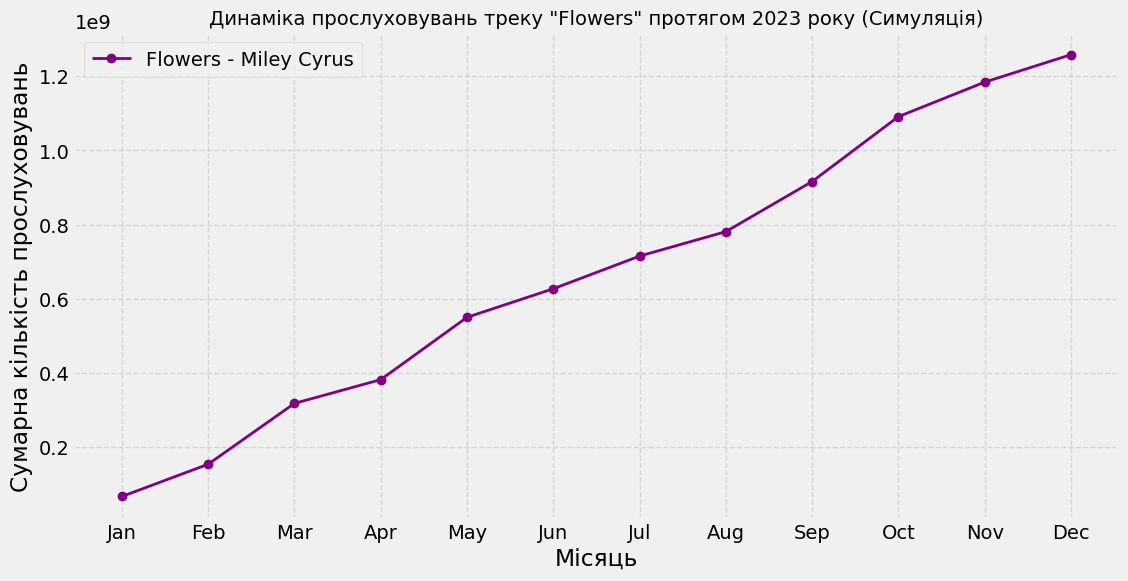

In [3]:
# Симуляція даних для одного треку (бо в CSV немає часового ряду)
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
# Генеруємо зростаючу кількість прослуховувань
streams_simulated = np.cumsum(np.random.randint(50, 200, size=12)) * 1000000

plt.figure(figsize=(12, 6))

# Побудова лінійного графіка
plt.plot(months, streams_simulated, marker='o', linestyle='-', color='purple', linewidth=2, label='Flowers - Miley Cyrus')

# Оформлення
plt.title('Динаміка прослуховувань треку "Flowers" протягом 2023 року (Симуляція)', fontsize=14)
plt.xlabel('Місяць')
plt.ylabel('Сумарна кількість прослуховувань')
plt.grid(True, linestyle='--', alpha=0.7)
plt.legend()

plt.show()

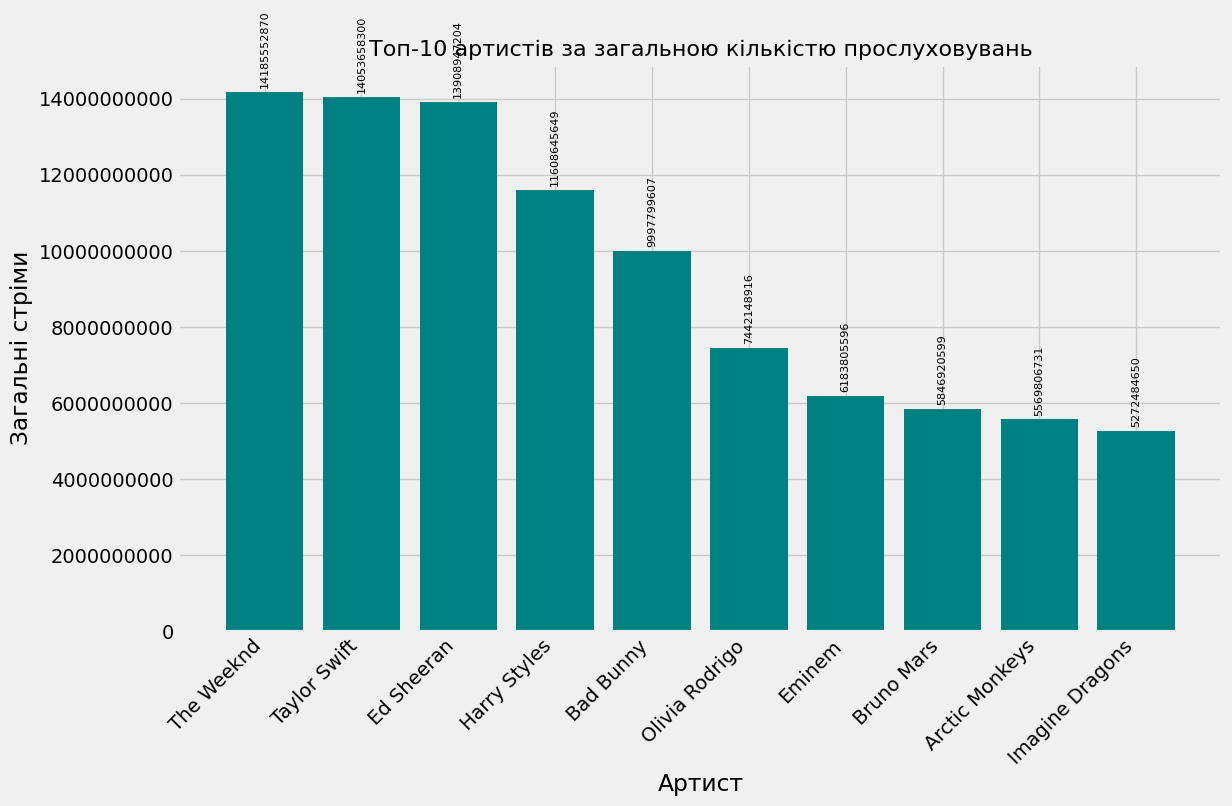

In [4]:
# Групуємо дані за артистом і сумуємо їхні стріми
top_artists = df.groupby('artist(s)_name')['streams'].sum().sort_values(ascending=False).head(10)

plt.figure(figsize=(12, 7))

# Звичайна стовпчикова діаграма (vertical bar)
# Використовуємо індекси (імена артистів) для X та значення для Y
bars = plt.bar(top_artists.index, top_artists.values, color='teal')

plt.title('Топ-10 артистів за загальною кількістю прослуховувань', fontsize=16)
plt.xlabel('Артист')
plt.ylabel('Загальні стріми')
plt.xticks(rotation=45, ha='right') # Поворот підписів, щоб не налізали один на одного
plt.ticklabel_format(style='plain', axis='y') # Прибираємо науковий формат (1e9)

# Додамо значення над стовпчиками
plt.bar_label(bars, fmt='%d', padding=3, rotation=90, fontsize=8)

plt.show()

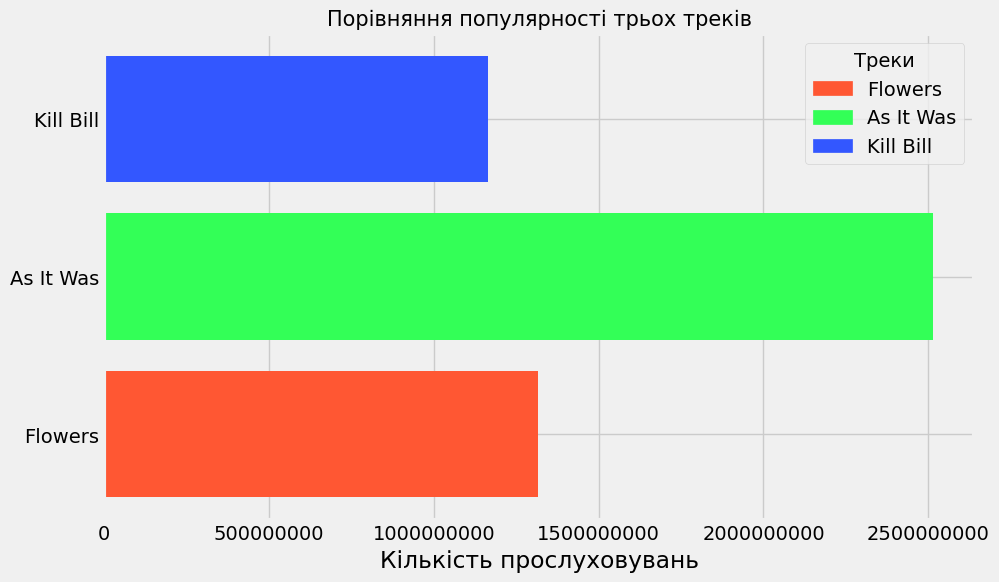

In [7]:
# Вибираємо 3 конкретні треки
target_tracks = ['Flowers', 'Kill Bill', 'As It Was']

# Фільтруємо датасет та ОДРАЗУ прибираємо дублікати, залишаючи тільки унікальні назви
comparison_df = df[df['track_name'].isin(target_tracks)].drop_duplicates(subset=['track_name'])

# Перевірка: чи знайшлися пісні?
if comparison_df.empty:
    print("❌ Пісні не знайдено! Перевір написання назв.")
else:
    plt.figure(figsize=(10, 6))

    # Створюємо список кольорів рівно стільки, скільки знайшлося пісень
    # (на випадок, якщо знайшлося менше 3-х)
    base_colors = ['#FF5733', '#33FF57', '#3357FF']
    # Беремо стільки кольорів, скільки у нас рядків у comparison_df
    current_colors = base_colors[:len(comparison_df)]

    # Горизонтальний графік
    plt.barh(comparison_df['track_name'], comparison_df['streams'], color=current_colors)

    plt.title('Порівняння популярності трьох треків', fontsize=15)
    plt.xlabel('Кількість прослуховувань')

    # Вимикаємо науковий формат (1e9) на осі X
    plt.ticklabel_format(style='plain', axis='x')

    # Спрощена легенда
    # Створюємо "фейкові" прямокутники для легенди, використовуючи правильні кольори
    patches = [plt.Rectangle((0,0),1,1, color=current_colors[i]) for i in range(len(comparison_df))]
    plt.legend(patches, comparison_df['track_name'].values, title="Треки")

    plt.show()